# MACHINE LEARNING Assignment-1-GROUP 150
## PS-10 -- GLOBAL AIR POLLUTION 

### List of active contributors :
<ol>
    <li>ARUN MATHEW  <b>(2021sc04982)</b>
<li>KANURU NAGESWARA RAO <b> (2021sc04876)</b>
<li>THAKKAR PRACHI CHETAN CHETNA <b>(2021sc04875)</b>
    <li>NAGPOOJITH BR <b>(2021sa04007)</b>   
</ol>

# PART-B - Dataset-based Implementation for GLOBAL AIR POLLUTION 

### BRIEF OVERVIEW OF THE PROCESS : 

The problem statement is to understand the Global Air pollution by analyzing the dataset "global air pollution dataset.csv" using EDA ( Exploratory Data Analysis ) .

Based on the insights obtained from EDA, create appropreate Machine Learning Models for predicting Air Quality indicator and classifying the data to various air quality categories.

#### Target Variables :

<b> Regression :</b> Data set is combination of Numerical and categorical features.Its evident that , the AQI value can be derived from the other numerical fields which are independent.

Hence , the variable - "AQI Value" is considered as Target variable for regression. The features are : 

<ol>
<li> CO AQI Value</li>
<li> Ozone AQI Value</li>
<li>NO2 AQI Value</li>
<li>PM2.5 AQI Value</li>
</ol>

<b> Classification :</b> "AQI Category " is the target ordinal variable for classification and can take one of the following classes.

<ol>
<li> Good </li>
<li> Moderate </li>
<li> Unhealthy for Sensitive Groups </li>
<li> Unhealthy </li>
<li> Very Unhealthy </li>   
<li> Hazardous </li>    
    
</ol>

<b> Ensemble ML :</b> Ensemble learning is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.

#### Libraries and packages that are used : 

In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import sklearn as sn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import copy
import statsmodels.api as sm
import sklearn.metrics as skm
import xgboost as xgb

from math import sqrt

warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from IPython.display import display

from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier, BaggingClassifier, HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor, AdaBoostRegressor


from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC

### Load dataset "global air pollution dataset.csv"

Note : The dataset file is expected to be located in the same location of the jupyter file 

In [2]:
df = pd.read_csv("global air pollution dataset.csv")

Check whether the dataset is loaded. View top 10 rows

In [3]:
df.head(10)

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good
5,United States of America,Punta Gorda,54,Moderate,1,Good,14,Good,11,Good,54,Moderate
6,Germany,Puttlingen,62,Moderate,1,Good,35,Good,3,Good,62,Moderate
7,Belgium,Puurs,64,Moderate,1,Good,29,Good,7,Good,64,Moderate
8,Russian Federation,Pyatigorsk,54,Moderate,1,Good,41,Good,1,Good,54,Moderate
9,Egypt,Qalyub,142,Unhealthy for Sensitive Groups,3,Good,89,Moderate,9,Good,142,Unhealthy for Sensitive Groups


# (A) Exploratory Data Analysis

View the columns of the data set

In [4]:
df.columns

Index(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category',
       'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value',
       'PM2.5 AQI Category'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


### Data Pre- processing for EDA :
    

The column names contain spaces. Clean up the column names by removing the spaces and converting to lower case

In [6]:
def clean_headers(val):
    if isinstance(val, str):
        # remove special chars (but skip emtpy spaces and all)
        val = "".join(char for char in val if char.isalnum() or char in (" ", "_"))
        # convert to snake case
        val = val.strip().lower().replace(" ", "_")
        return val
    else:
        return val

df = df.rename(columns=clean_headers)   

In [7]:
# Total number of records 22643
# Other values - min,mean,max and percentiles values are obtained
df.describe()

,aqi_value,co_aqi_value,ozone_aqi_value,no2_aqi_value,pm25_aqi_value
count,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000
mean,72.010868,1.368367,35.193709,3.063334,68.519755
std,56.055220,1.832064,28.098723,5.254108,54.796443
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,79.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


Create box plot for identifying outliers. 
Apply formatting to the boxplot

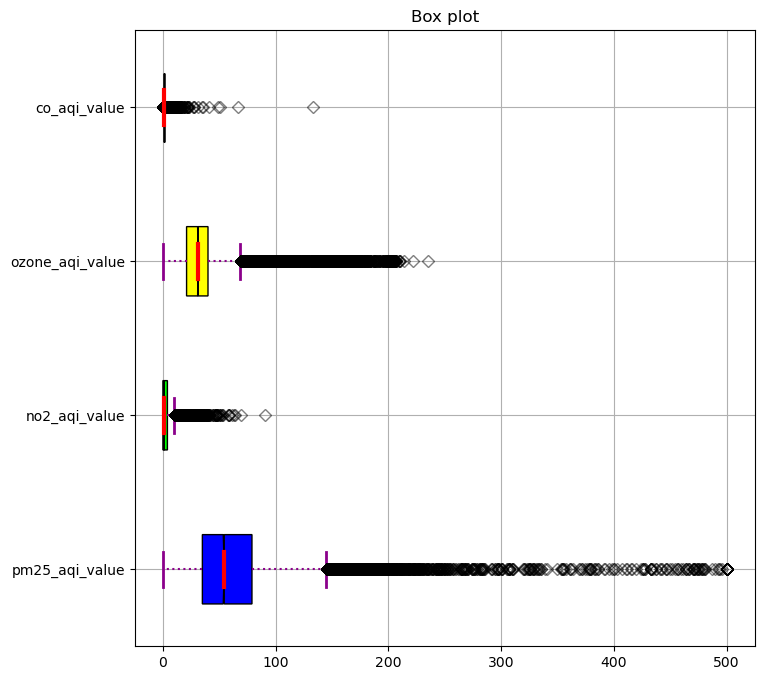

In [8]:
data = [df['pm25_aqi_value'], df['no2_aqi_value'], df['ozone_aqi_value'], df['co_aqi_value']]
 
fig = plt.figure(figsize =(8, 8))
ax = fig.add_subplot(111)
# Creating axes instance
bp = ax.boxplot(data, patch_artist = True, notch ='True', vert = 0)
colors = ['#0000FF', '#00FF00', '#FFFF00', '#FF00FF']
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
 
# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
 
# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)
 
# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
 
# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)
     
# x-axis labels
ax.set_yticklabels(['pm25_aqi_value', 'no2_aqi_value', 'ozone_aqi_value', 'co_aqi_value'])
 
# Adding title
plt.title("Box plot")
plt.grid()
# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
     
# show plot
plt.show()


<p> Box-plot can be used to understand the spread of data like - minimum ,maximum , median, quartile  values and outliers .</p>
<p>The above box plot is indicating many outliers. Create a histogram to understand the skewness</p>

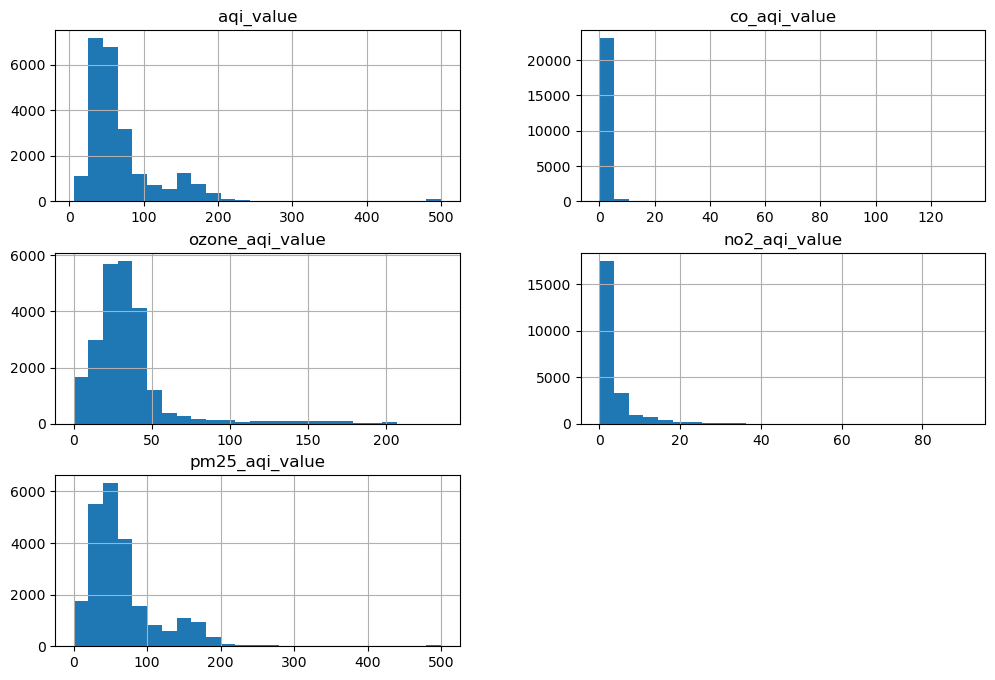

In [9]:
df.hist(figsize=(12,8),bins=25)
plt.show()

### Outliers :

Based on the box plot and the histogram, it is evident that "co_aqi_value" has one outlier. Removing this outlier will be the solution to handle this case.

In [10]:
df[df['co_aqi_value'] >= 100]

,country,city,aqi_value,aqi_category,co_aqi_value,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm25_aqi_value,pm25_aqi_category
5156,United States of America,Durango,500,Hazardous,133,Unhealthy for Sensitive Groups,0,Good,53,Moderate,500,Hazardous


City "Durango" has extermely high CO AQI Value and appears to be a clear outlier. 
<p><b> Outlier Handling </b></p>
We will remove this row from the dataset. 

In [11]:
df.drop(df[df['co_aqi_value'] >= 100].index, inplace=True)

#### Observations :

<p> Based on the box-plot and Histograms , we could observe there are outliers particularily in "pm25_aqi_value" , "ozone_aqi_value" and "aqi_value".</p>

<p>However these outliers seem to be actual data points and removing these may hamper the algorithm's efficiency. Hence decided not to remove these outliers.</p>


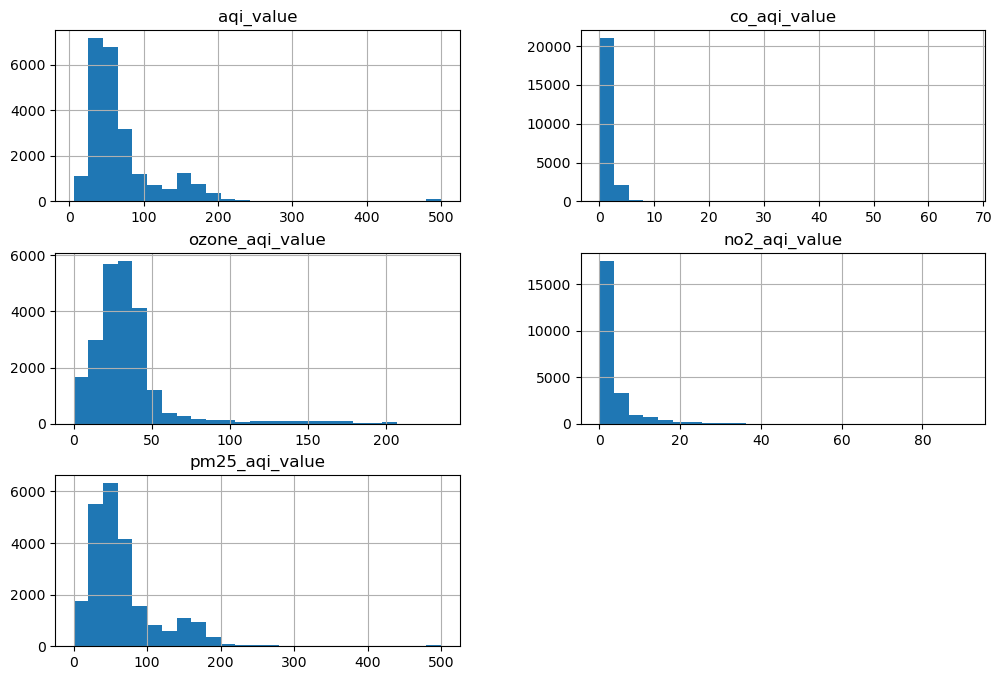

In [12]:
df.hist(figsize=(12,8),bins=25);

Verify whether there are any null values in columns :

In [13]:
df.isnull().sum()

country               427
city                    1
aqi_value               0
aqi_category            0
co_aqi_value            0
co_aqi_category         0
ozone_aqi_value         0
ozone_aqi_category      0
no2_aqi_value           0
no2_aqi_category        0
pm25_aqi_value          0
pm25_aqi_category       0
dtype: int64

There are 427 null values in "Country" column and 1 null value in "city". Since both these columns are categorical columns and does not have any direct impact on the model, we will leave the row with null values as it is.

Check for duplication :

In [14]:
sum(df.duplicated())

0

there are no duplicates found in data.

View all the column names :

In [15]:
df.columns

Index(['country', 'city', 'aqi_value', 'aqi_category', 'co_aqi_value',
       'co_aqi_category', 'ozone_aqi_value', 'ozone_aqi_category',
       'no2_aqi_value', 'no2_aqi_category', 'pm25_aqi_value',
       'pm25_aqi_category'],
      dtype='object')

In [16]:
df.country.unique().size

176

In [17]:
df.city.unique().size

23462

 We have 176 countries and 23431 cities.

Check the distribution of "aqi_category" :

In [18]:
df['aqi_category'].value_counts()

Good                              9936
Moderate                          9231
Unhealthy                         2227
Unhealthy for Sensitive Groups    1591
Very Unhealthy                     287
Hazardous                          190
Name: aqi_category, dtype: int64

[]

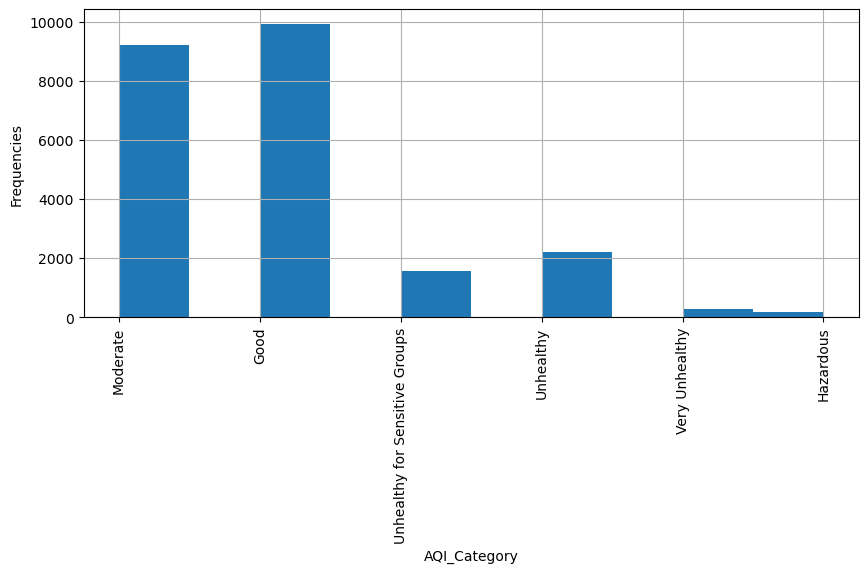

In [19]:
plt.figure(figsize=(10,4))
plt.xticks(rotation=90)
df.aqi_category.hist()

plt.xlabel("AQI_Category")
plt.ylabel("Frequencies")
plt.plot()

#### AQI-Category distribution among cities : 

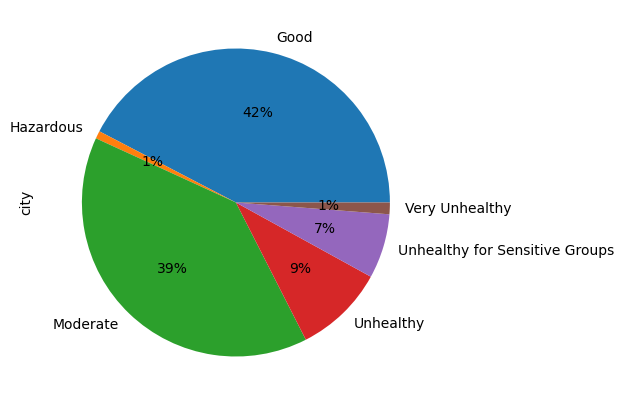

In [20]:
fig, ax = plt.subplots(figsize=(5,5))
df.groupby(['aqi_category']).count().plot(
    kind='pie', y='city', autopct='%1.0f%%', ax=ax, legend=False);

In [21]:
# Check the datatypes
df.dtypes

country               object
city                  object
aqi_value              int64
aqi_category          object
co_aqi_value           int64
co_aqi_category       object
ozone_aqi_value        int64
ozone_aqi_category    object
no2_aqi_value          int64
no2_aqi_category      object
pm25_aqi_value         int64
pm25_aqi_category     object
dtype: object

Fetch all the numerical columns of the dataset to a new dataframe.  

In [22]:
numeric_columns=df._get_numeric_data()
numeric_columns

,aqi_value,co_aqi_value,ozone_aqi_value,no2_aqi_value,pm25_aqi_value
0,51,1,36,0,51
1,41,1,5,1,41
2,66,1,39,2,66
3,34,1,34,0,20
4,22,0,22,0,6
...,...,...,...,...,...
23458,184,3,154,2,184
23459,50,1,20,5,50
23460,50,1,22,1,50
23461,71,1,44,2,71


Create pairplot to understand the distribution of the feature values:

<Figure size 800x600 with 0 Axes>

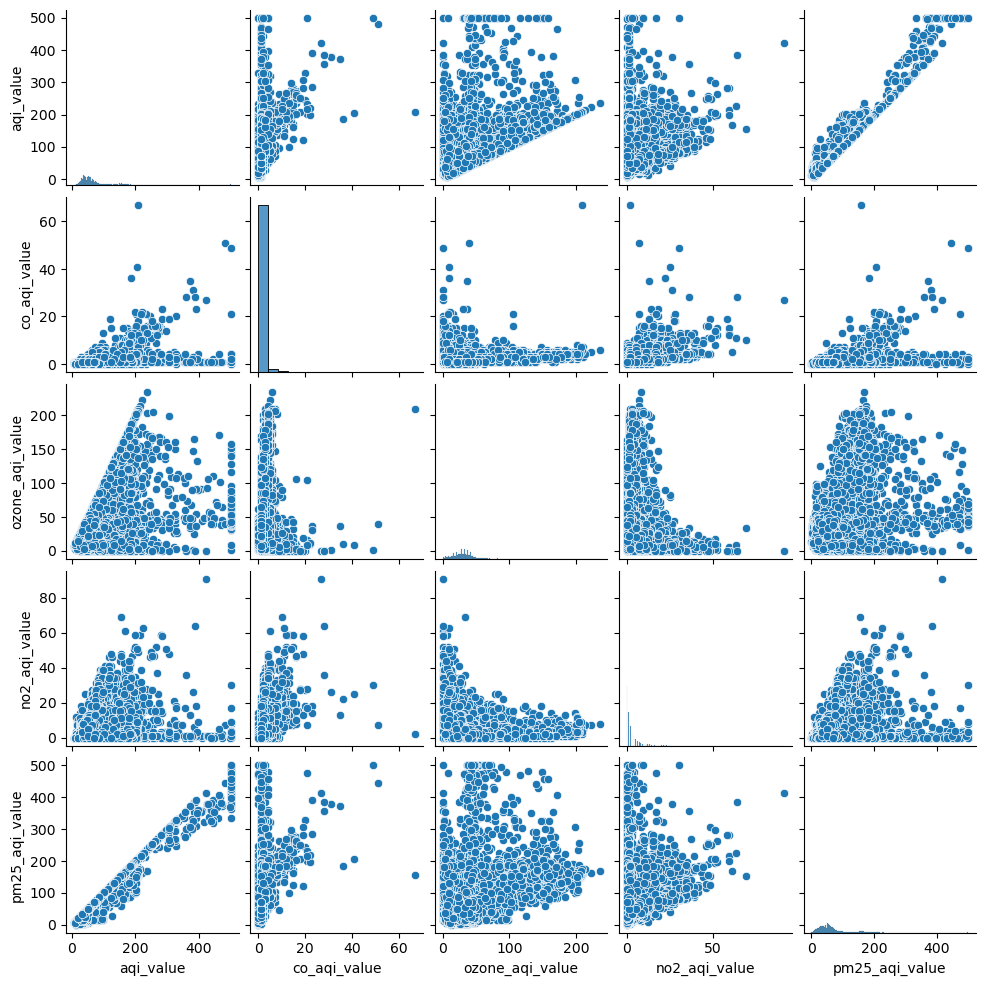

In [23]:
plt.figure(figsize=(8, 6))
sns.pairplot(data=df,height=2)

Observation: pm25_aqi_value seems to have strong linear relation with aqi_value

Create a correlation heatmap to understand the correlation more clearly.

<AxesSubplot:>

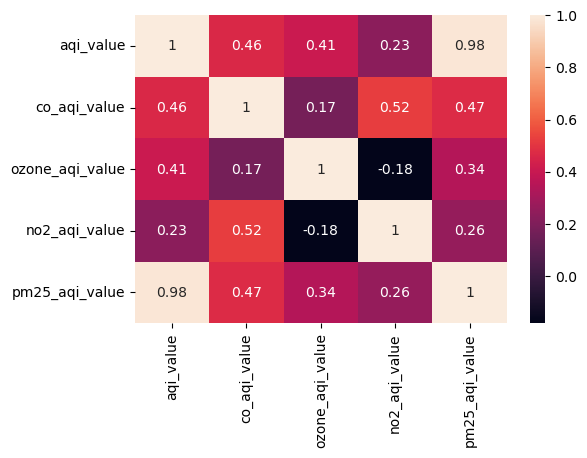

In [24]:
corr_matrix=df.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix,annot=True)

pm25_aqi_value and aqi_value are highly positively correlated. 

# (B) Regression :

Applying regression algorithms to predict "aqi_value" based on other numerical features :

In [25]:
# separate the features and the target variable for regression model building
data_df = df[['co_aqi_value', 'ozone_aqi_value', 'no2_aqi_value', 'pm25_aqi_value','aqi_value']]
data_df.reset_index()

,index,co_aqi_value,ozone_aqi_value,no2_aqi_value,pm25_aqi_value,aqi_value
0,0,1,36,0,51,51
1,1,1,5,1,41,41
2,2,1,39,2,66,66
3,3,1,34,0,20,34
4,4,0,22,0,6,22
...,...,...,...,...,...,...
23457,23458,3,154,2,184,184
23458,23459,1,20,5,50,50
23459,23460,1,22,1,50,50
23460,23461,1,44,2,71,71


In [26]:
# Define the features and target
num_columns = ['co_aqi_value', 'ozone_aqi_value', 'no2_aqi_value', 'pm25_aqi_value']
target_column = ['aqi_value']

Try applying a 'regression-line' to understand the fitting..

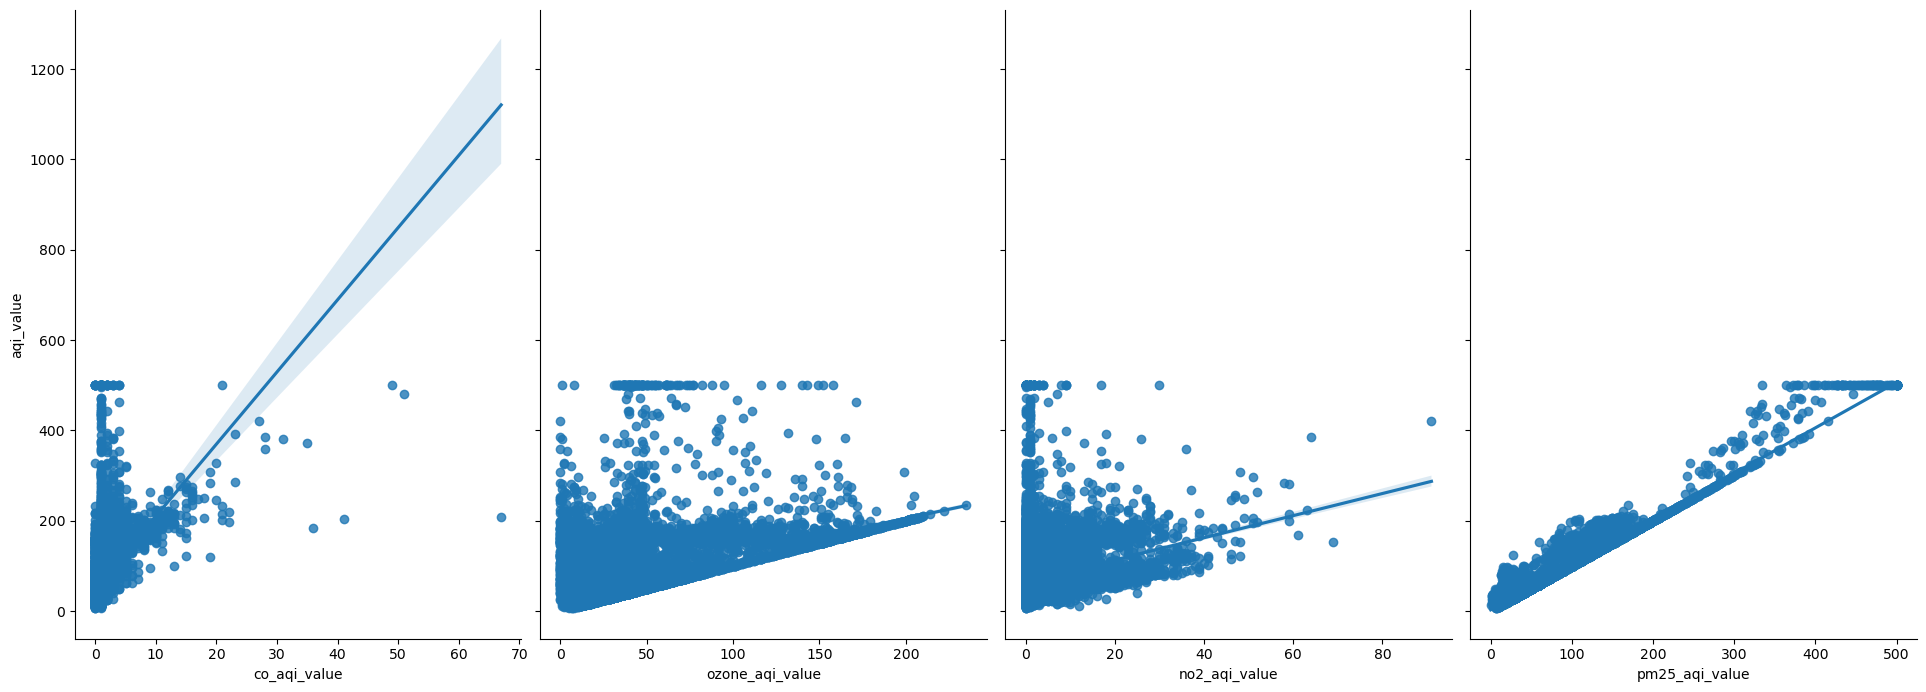

In [27]:
sns.pairplot(data_df, x_vars=num_columns, y_vars=target_column, size=7, aspect=0.7, kind='reg')

#### Create test and train split

Using "80-20 split" for training and test data:

In [28]:
X_train, X_test, y_train, y_test = train_test_split(data_df[num_columns], data_df[target_column], test_size=0.2)

In [29]:
print('Number of training records',len(X_train))
print('Number of test records',len(X_test))

Number of training records 18769
Number of test records 4693


## 1. Using 'statsmodels' OLS :

In [30]:
from sklearn.metrics import mean_squared_error
model = sm.OLS(np.asarray(y_train), np.asarray(X_train))
ols_results = model.fit()
print(ols_results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          4.792e+05
Date:                Sun, 12 Mar 2023   Prob (F-statistic):                        0.00
Time:                        22:09:02   Log-Likelihood:                         -67974.
No. Observations:               18769   AIC:                                  1.360e+05
Df Residuals:                   18765   BIC:                                  1.360e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Using OLS library , we can observe the below key metrics in the training data.

R^2 value 0.991 ,
Adj.R-Squared 0.991 ,
standard errors below 0.1 

## 2. Using sklearn LinerRegression Model

In [31]:
lin_model = LinearRegression()
lin_model.fit(X_train,y_train)
print('Model score based on training data',lin_model.score(X_train, y_train))    

Model score based on training data 0.9746257299173713


## 3. Using sklearn Linear regression with Scaling 

In [32]:
std_scaler = StandardScaler()
scaled_features = std_scaler.fit_transform(numeric_columns.values)
scaled_features_df = pd.DataFrame(scaled_features, index=numeric_columns.index, columns=numeric_columns.columns)

# Using standard scalar to create a scaled the dataset
scaled_X1_train, scaled_X1_test, scaled_y1_train, scaled_y1_test = train_test_split(scaled_features_df[num_columns], 
                                                                                    scaled_features_df[target_column], 
                                                                                    test_size=0.2)

In [33]:
sc_lin_model = LinearRegression()
sc_lin_model.fit(scaled_X1_train,scaled_y1_train)
scaled_score = sc_lin_model.score(scaled_X1_train, scaled_y1_train)
print('Scaled Score:',scaled_score)

Scaled Score: 0.974271427439742


## 3. Stochastic Gradient Descent Regressor : 

The class SGDRegressor implements a plain stochastic gradient descent learning routine which supports different loss functions and penalties to fit linear regression models. SGDRegressor is well suited for regression problems with a large number of training samples (> 10.000)

In [34]:
X2_train, X2_test, y2_train, y2_test = train_test_split(scaled_features_df[num_columns], 
                                                                                    scaled_features_df[target_column], 
                                                                                    test_size=0.2)

# StandardScalar is added in the pipeline for scaling values
est = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
est.fit(X2_train, y2_train)
est_score = est.score(X2_train, y2_train)
print('EST Score:', est_score)

EST Score: 0.9750895188749389


In [35]:
knn_model3 = KNeighborsRegressor(n_neighbors=3)
knn_model3.fit(X2_train, y2_train)
knn_score3 = knn_model3.score(X2_train, y2_train)
print('KNN Score:', knn_score3)

KNN Score: 0.9967466691176217


In [36]:
knn_model5 = KNeighborsRegressor(n_neighbors=5)
knn_model5.fit(X2_train, y2_train)
knn_score5 = knn_model5.score(X2_train, y2_train)
print('KNN Score5:', knn_score5)

KNN Score5: 0.9950760023471876


In [37]:
knn_model12 = KNeighborsRegressor(n_neighbors=12)
knn_model12.fit(X2_train, y2_train)
knn_score12 = knn_model12.score(X2_train, y2_train)
print('KNN Score12:', knn_score12)

KNN Score12: 0.9921193660677338


In [38]:
knn_model2 = KNeighborsRegressor(n_neighbors=2)
knn_model2.fit(X2_train, y2_train)
knn_score2 = knn_model2.score(X2_train, y2_train)
print('KNN Score2:', knn_score2)

KNN Score2: 0.9974464699079519


## 4. Decision Tree Regressor :

Tree Score (default tree setting): 1.0


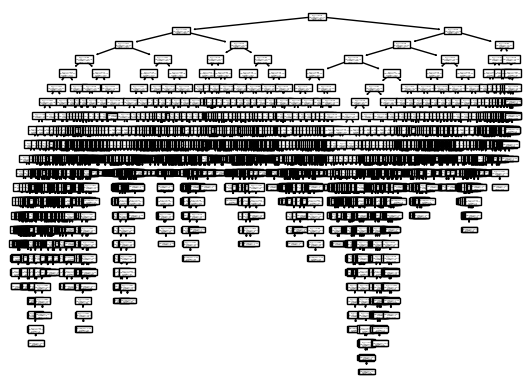

In [39]:
from sklearn import tree
tree_regressor0 = DecisionTreeRegressor(random_state = 0) 
tree_regressor0.fit(X2_train, y2_train)
tree_score0 = tree_regressor0.score(X2_train, y2_train)
print('Tree Score (default tree setting):', tree_score0)
tree.plot_tree(tree_regressor0);

Observations :

<p>The tree depth is very large and giving a training score of '1.0' </p>    
This is probably an indicator of "Over-fitting" and calls for 'Hyper paramerameter tuning' to generalize the Tree.    

Tree Score (max depth =5): 0.9897719786301354


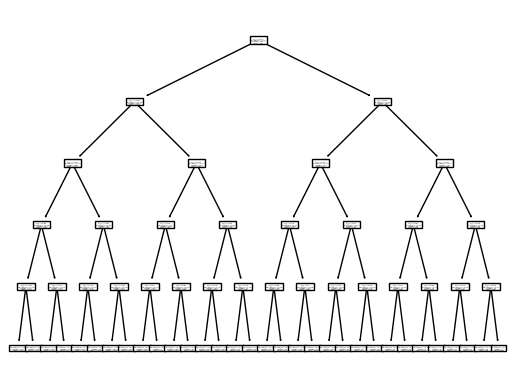

In [40]:
from sklearn import tree
tree_regressor5 = DecisionTreeRegressor(random_state = 0, max_depth=5) 
tree_regressor5.fit(X2_train, y2_train)
tree_score5 = tree_regressor5.score(X2_train, y2_train)
print('Tree Score (max depth =5):', tree_score5)
tree.plot_tree(tree_regressor5);

Tree Score (max depth=7): 0.9981929990924839


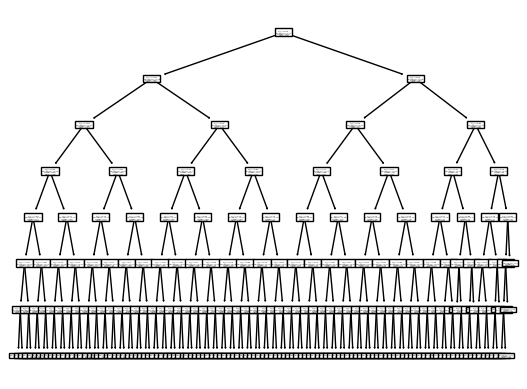

In [41]:
from sklearn import tree
tree_regressor7 = DecisionTreeRegressor(random_state = 0, max_depth=7) 
tree_regressor7.fit(X2_train, y2_train)
tree_score7 = tree_regressor7.score(X2_train, y2_train)
print('Tree Score (max depth=7):', tree_score7)
tree.plot_tree(tree_regressor7);

Tree Score (min sample split=10): 0.9956018409210263


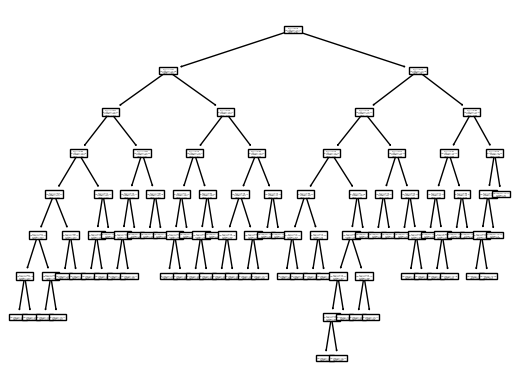

In [42]:
from sklearn import tree
tree_regressor10 = DecisionTreeRegressor(random_state = 0,min_samples_split=10, max_features='auto', max_leaf_nodes=50) 
tree_regressor10.fit(X2_train, y2_train)
tree_score10 = tree_regressor10.score(X2_train, y2_train)
print('Tree Score (min sample split=10):', tree_score10)
tree.plot_tree(tree_regressor10);

### Comparison of training score for all the regression models :

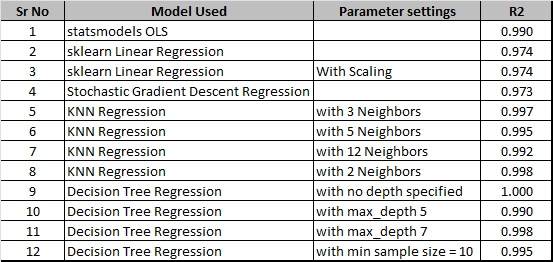

In [43]:
def print_score_arr(score_arr):
    headers = ['Model Name', 'Mean absolute error', 'Mean squared error', 'Median absolute error', 'Explain variance score', 'R2']
    score_df = pd.DataFrame(score_arr, columns=headers)
    display(score_df)

def print_score(model_name, y1_test, pred):
    mean_ae = round(skm.mean_absolute_error(y1_test, pred), 2)
    mse = round(skm.mean_squared_error(y1_test, pred), 2)
    med_ae = round(skm.median_absolute_error(y1_test, pred), 2)
    exp_var = round(skm.explained_variance_score(y1_test, pred), 2)
    r2 = round(skm.r2_score(y1_test, pred), 2)
    return [model_name, mean_ae, mse, med_ae, exp_var, r2]
    
def predict(model_name, model, x2_test, y2_test):
    predictions = model.predict(x2_test)
    return print_score(model_name, y2_test, predictions)

In [44]:
print('Predicting output for all models')

results = []
results.append(predict('statsmodels OLS',ols_results, np.asarray(X_test), np.asarray(y_test) ))
results.append(predict('sklearn Linear Regression',lin_model, X_test, y_test) )
results.append(predict('sklearn Linear Regression(scaled)',sc_lin_model,  scaled_X1_test, scaled_y1_test ))
results.append(predict('Stochastic Gradient Descent Regression',est, X_test, y_test))
results.append(predict('KNN Regression (3N)',knn_model3, X_test, y_test))
results.append(predict('KNN Regression (5N)',knn_model5, X_test, y_test))
results.append(predict('KNN Regression (12N)',knn_model12, X_test, y_test))
results.append(predict('Decision Tree Regression',tree_regressor0, X_test, y_test))
results.append(predict('Decision Tree Regression (depth=5)',tree_regressor5, X_test, y_test))
results.append(predict('Decision Tree Regression (depth=7)',tree_regressor7, X_test, y_test))
results.append(predict('Decision Tree Regression (sample=10)',tree_regressor10, X_test, y_test))

print_score_arr(results)


Predicting output for all models


,Model Name,Mean absolute error,Mean squared error,Median absolute error,Explain variance score,R2
0,statsmodels OLS,4.92,72.58,3.19,0.97,0.97
1,sklearn Linear Regression,4.82,72.67,2.96,0.97,0.97
2,sklearn Linear Regression(scaled),0.09,0.02,0.05,0.98,0.98
3,Stochastic Gradient Descent Regression,3.92,89.14,1.05,0.97,0.97
4,KNN Regression (3N),63.52,6800.86,46.57,0.01,-1.44
5,KNN Regression (5N),63.60,6808.10,46.48,0.01,-1.45
6,KNN Regression (12N),63.78,6824.23,46.70,0.01,-1.45
7,Decision Tree Regression,63.82,6855.02,47.00,0.00,-1.46
8,Decision Tree Regression (depth=5),63.30,6798.04,46.37,-0.00,-1.44
9,Decision Tree Regression (depth=7),63.88,6867.74,47.00,-0.00,-1.47


Note: In practice, R^2 will be negative whenever your model’s predictions are worse than a constant function that always predicts the mean of the data

### Conclusion : 

<b>sklearn Linear Regression with standard scalar is providing the best prediction model and can be used for the given dataset.</b>

# (C) Classification :

We will use categorical columns for the classification task. Extract relevant features from the data set

In [45]:
class_features = ['co_aqi_category', 'ozone_aqi_category', 'no2_aqi_category', 'pm25_aqi_category','aqi_category'] 
cl_data_df = df[class_features].reset_index()

In [46]:
cl_data_df
data_df_class = cl_data_df.set_index('index')
#data_df_class
Xc_train, Xc_test, yc_train, yc_test = train_test_split(cl_data_df[class_features[:-1]], cl_data_df[['aqi_category']], test_size=0.2)

## Data preprocessing for classification :

Use encoding for converting categorical columns to ordinal values. We are using OrdinalEncoder to do this conversion.

In [47]:
input_enc = OrdinalEncoder()
output_enc = OrdinalEncoder()

input_enc.fit(cl_data_df[class_features[:-1]].values)
output_enc.fit(cl_data_df[['aqi_category']].values)

aqi_values = cl_data_df['aqi_category'].unique()

Xc_train_enc = input_enc.transform(Xc_train.values)
Yc_train_enc = output_enc.transform(yc_train.values)

Xc_test_enc = input_enc.transform(Xc_test)
Yc_test_enc = output_enc.transform(yc_test)

### 1. Decision Tree Classification :

The decision tree classifier is supervised learning method for multiclass classification. We use 'gini index' as the criteria for generating the splits.

In [48]:
clf_tree = tree.DecisionTreeClassifier(criterion='gini')
scores = cross_val_score(clf_tree, Xc_train_enc, Yc_train_enc, cv=10, scoring='accuracy')

print("Mean score of cross validation %0.5f with a standard deviation of %0.5f" % (scores.mean(), scores.std()))

clf_tree = clf_tree.fit(Xc_train_enc, Yc_train_enc)
print('Score:',clf_tree.score(Xc_train_enc, Yc_train_enc))

Mean score of cross validation 0.99920 with a standard deviation of 0.00072
Score: 0.9992540891896212


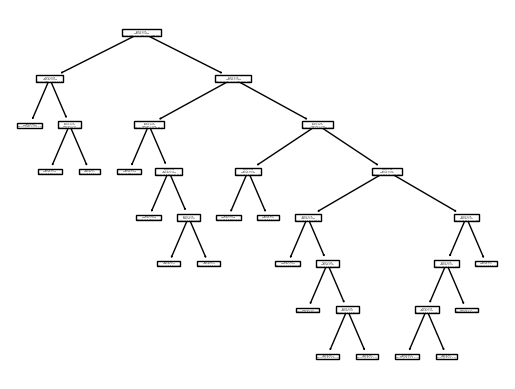

In [49]:
tree.plot_tree(clf_tree);

In [50]:
predicted = clf_tree.predict(Xc_test_enc)
predicted_label = output_enc.inverse_transform(predicted.reshape(-1,1))

print('Accuracy:',metrics.accuracy_score(yc_test, predicted_label))
#print precision value of model
print('Precision:',metrics.precision_score(yc_test, predicted_label,average='micro'))
#print recall value of model
print('Recall:',metrics.recall_score(yc_test, predicted_label,average='micro'))
print('F1:',metrics.f1_score(yc_test, predicted_label,average='micro'))
print('R2:',metrics.r2_score(Yc_test_enc, predicted))

Accuracy: 0.998934583422118
Precision: 0.998934583422118
Recall: 0.998934583422118
F1: 0.998934583422118
R2: 0.9908679006708581


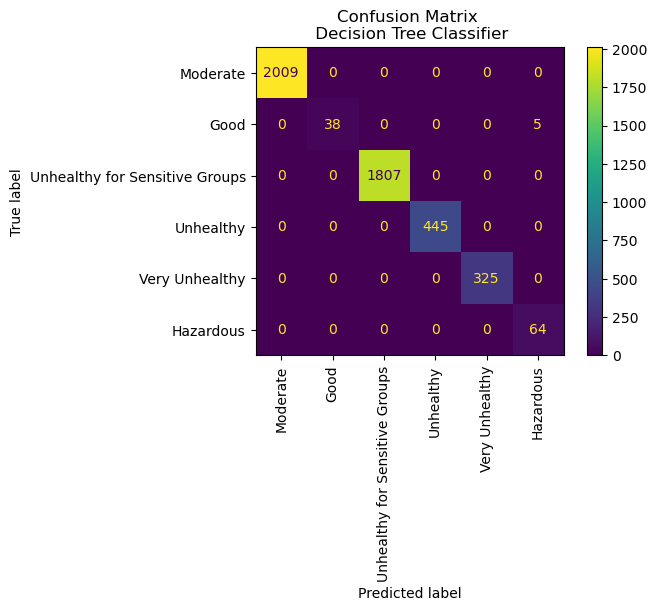

In [51]:
fig, ax = plt.subplots(figsize=(6,4))
cm = confusion_matrix(yc_test, predicted_label)  
ax.set_title('Confusion Matrix \n Decision Tree Classifier')
cm_display = ConfusionMatrixDisplay(cm, display_labels=aqi_values).plot(xticks_rotation='vertical', ax=ax)


Decision Tree classifier is giving a good acuracy score both in training and test data and is a good candidate for final model selection.

### 2. K-Nearest Neighbor Classification

In [52]:
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
knn_classifier.fit(Xc_train_enc, Yc_train_enc)
knn_score = knn_classifier.score(Xc_train_enc, Yc_train_enc)
print('KNN Accuracy:',knn_score)

KNN Accuracy: 0.9992008098460227


In [53]:
yknn_pred = knn_classifier.predict(Xc_test_enc)
yknn_pred_label = output_enc.inverse_transform(yknn_pred.reshape(-1,1))

print('Accuracy:',metrics.accuracy_score(yc_test, yknn_pred_label))
#print precision value of model
print('Precision:',metrics.precision_score(yc_test, yknn_pred_label,average='micro'))
#print recall value of model
print('Recall:',metrics.recall_score(yc_test, yknn_pred_label,average='micro'))
print('F1:',metrics.f1_score(yc_test, yknn_pred_label,average='micro'))
print('R2:',metrics.r2_score(Yc_test_enc, yknn_pred))

Accuracy: 0.998934583422118
Precision: 0.998934583422118
Recall: 0.998934583422118
F1: 0.998934583422118
R2: 0.9908679006708581


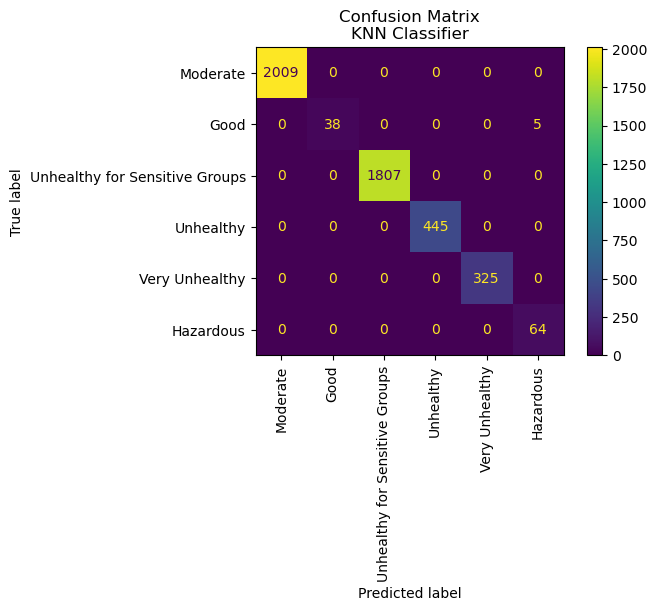

In [54]:
fig, ax = plt.subplots(figsize=(6,4))
ax.set_title('Confusion Matrix\nKNN Classifier')
cm = confusion_matrix(yc_test, yknn_pred_label)  
cm_display = ConfusionMatrixDisplay(cm, display_labels=aqi_values).plot(xticks_rotation='vertical', ax=ax)

### 3. Naive Bayes Classification

In [55]:
gaussNb_classifier = GaussianNB()  
gaussNb_classifier.fit(Xc_train_enc, Yc_train_enc)
gaussNb_score = gaussNb_classifier.score(Xc_train_enc, Yc_train_enc)
print('Gauss NB Accuracy:',gaussNb_score)


Gauss NB Accuracy: 0.8866215568224199


In [56]:
yc_nb_pred = gaussNb_classifier.predict(Xc_test_enc)  


In [57]:
print('Accuracy:',metrics.accuracy_score(Yc_test_enc, yc_nb_pred))
#print precision value of model
print('Precision:',metrics.precision_score(Yc_test_enc, yc_nb_pred,average='micro'))
#print recall value of model
print('Recall:',metrics.recall_score(Yc_test_enc, yc_nb_pred,average='micro'))
print('F1:',metrics.f1_score(Yc_test_enc, yc_nb_pred,average='micro'))
print('R2:',metrics.r2_score(Yc_test_enc, yc_nb_pred))

Accuracy: 0.8840826763264437
Precision: 0.8840826763264437
Recall: 0.8840826763264437
F1: 0.8840826763264437
R2: 0.932993221172421


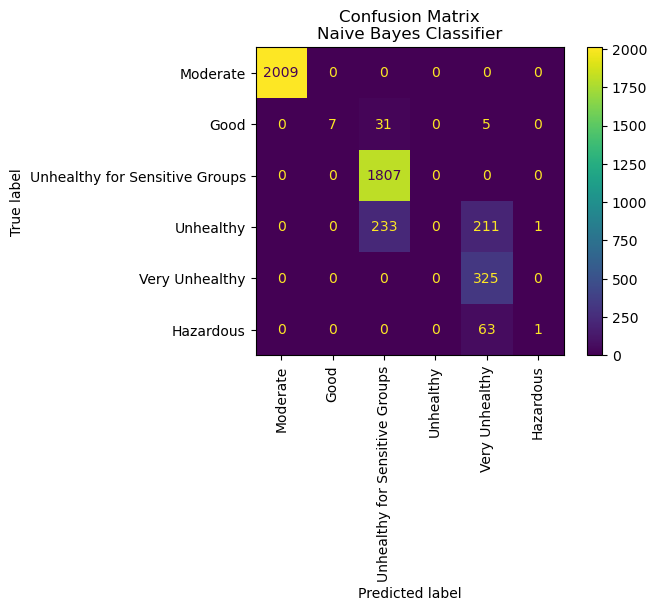

In [58]:
fig, ax = plt.subplots(figsize=(6,4))
ax.set_title('Confusion Matrix\nNaive Bayes Classifier')
cm = confusion_matrix(Yc_test_enc, yc_nb_pred) 
cm_display = ConfusionMatrixDisplay(cm, display_labels=aqi_values).plot(xticks_rotation='vertical',ax=ax)

### 4. Logistic Regression

#### 4.1 Using numerical columns for logistic regression

In [59]:
X_lg_train, X_lg_test, y_lg_train, y_lg_test = train_test_split(data_df[num_columns],df[['aqi_category']], 
                                                    test_size = 0.20, random_state = 99)

input_enc = OrdinalEncoder()
output_enc = OrdinalEncoder()

class_features = ['co_aqi_category', 'ozone_aqi_category', 'no2_aqi_category', 'pm25_aqi_category','aqi_category'] 

output_enc.fit(df[['aqi_category']].values)

Y_lg = output_enc.transform(y_lg_train.values)

Y_lg_test_enc = output_enc.transform(y_lg_test.values)

model = LogisticRegression(multi_class='multinomial')
model.fit(X_lg_train, Y_lg)
lg_score = model.score(X_lg_train,Y_lg)
print('Score of Logistic Regression with Numerical features:', lg_score)

Score of Logistic Regression with Numerical features: 0.821301081570675


In [60]:
predictions_lg = model.predict(X_lg_test)
c_matrix = metrics.confusion_matrix(Y_lg_test_enc, predictions_lg)

print('Accuracy:',metrics.accuracy_score(Y_lg_test_enc, predictions_lg))
#print precision value of model
print('Precision:',metrics.precision_score(Y_lg_test_enc, predictions_lg,average='micro'))
#print recall value of model
print('Recall:',metrics.recall_score(Y_lg_test_enc, predictions_lg,average='micro'))
print('F1:',metrics.f1_score(Y_lg_test_enc, predictions_lg,average='micro'))
print('R2:',metrics.r2_score(Y_lg_test_enc, predictions_lg))

Accuracy: 0.8286810142765821
Precision: 0.8286810142765821
Recall: 0.8286810142765821
F1: 0.8286810142765821
R2: 0.6648441642496251


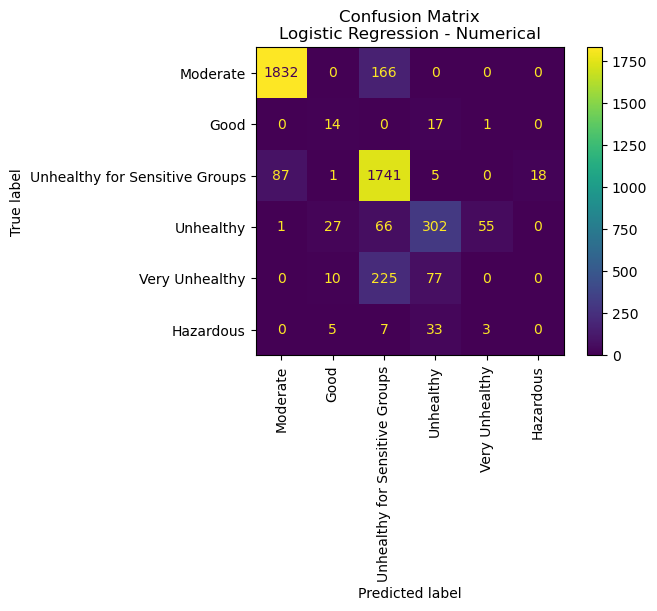

In [61]:
fig, ax = plt.subplots(figsize=(6,4))
ax.set_title('Confusion Matrix\nLogistic Regression - Numerical')
cm = confusion_matrix(Y_lg_test_enc, predictions_lg) 
cm_display = ConfusionMatrixDisplay(cm, display_labels=aqi_values).plot(xticks_rotation='vertical',ax=ax)

#### 4.2 Using categorical features for logistic regression :

In [62]:
logistic_reg = LogisticRegression(multi_class='multinomial')
logistic_reg.fit(Xc_train_enc, Yc_train_enc)
log_score = logistic_reg.score(Xc_train_enc, Yc_train_enc)
print('Score of Logistic Regression with Categorical features:', log_score)

Score of Logistic Regression with Categorical features: 0.9812989503969312


In [63]:
predictions_lg2 = logistic_reg.predict(Xc_test_enc)
c_matrix = metrics.confusion_matrix(Yc_test_enc, predictions_lg2)

print('Accuracy:',metrics.accuracy_score(Yc_test_enc, predictions_lg2))
#print precision value of model
print('Precision:',metrics.precision_score(Yc_test_enc, predictions_lg2,average='micro'))
#print recall value of model
print('Recall:', metrics.recall_score(Yc_test_enc, predictions_lg2,average='micro'))
print('F1:', metrics.f1_score(Yc_test_enc, predictions_lg2,average='micro'))
print('R2:',metrics.r2_score(Yc_test_enc, predictions_lg2))

Accuracy: 0.9803963349669721
Precision: 0.9803963349669721
Recall: 0.9803963349669721
F1: 0.9803963349669721
R2: 0.977512205401988


## Summary of Classification Models : 

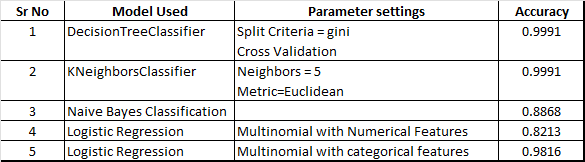

Observations : All the classification models are giving good accuracy . But 'K-Neighbors Classifiers' amd 'Decision-Tree Classifiers' stands out interms of training accuracy .

The test classification output matrices are provided below:

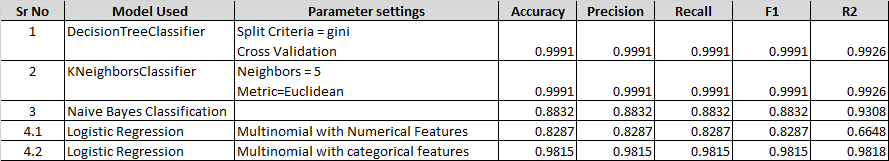

#### Based on the test results, Decision Tree Classifier and K-Nearest Neighbor Classifier are equally effective and provides the highest numbers in all evaluation matrices.

# (D) Ensemble ML

In [64]:
class_features = ['co_aqi_category', 'ozone_aqi_category', 'no2_aqi_category', 'pm25_aqi_category','aqi_category'] 
cl_data_df = df[class_features].reset_index()

In [65]:
cl_data_df
data_df_class = cl_data_df.set_index('index')
#data_df_class
Xc_eml_train, Xc_eml_test, yc_eml_train, yc_eml_test = train_test_split(cl_data_df[class_features[:-1]], cl_data_df[['aqi_category']], test_size=0.2)

## Data preprocessing for classification :

Use encoding for converting categorical columns to ordinal values. We are using OrdinalEncoder to do this conversion.

In [66]:
input_enc = OrdinalEncoder(unknown_value=-1, handle_unknown='use_encoded_value')
output_enc = OrdinalEncoder(unknown_value=-1, handle_unknown='use_encoded_value' )

class_features = ['co_aqi_category', 'ozone_aqi_category', 'no2_aqi_category', 'pm25_aqi_category','aqi_category'] 

input_enc.fit(cl_data_df[class_features[:-1]].values)
output_enc.fit(cl_data_df[['aqi_category']].values)

X_eml_enc = input_enc.transform(Xc_eml_train.values)
X_test_eml_enc = input_enc.transform(Xc_eml_test.values)

Y_eml_enc = output_enc.transform(yc_eml_train.values)
Y_eml_test_enc = output_enc.transform(yc_eml_test.values)


## Ensemble Classification Techniques

### 1. Random Forest Classifier

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

In [67]:
rfc = RandomForestClassifier(n_estimators=100)
rfc = rfc.fit(X_eml_enc, Y_eml_enc)

scores = cross_val_score(rfc, X_eml_enc, Y_eml_enc, cv=10, scoring='accuracy')

print("Mean score of cross validation %0.5f with a standard deviation of %0.5f" % (scores.mean(), scores.std()))
print('Score:',rfc.score(X_eml_enc, Y_eml_enc))

Mean score of cross validation 0.99909 with a standard deviation of 0.00048
Score: 0.9991475305024242


In [68]:
predicted_rfc = rfc.predict(input_enc.transform(Xc_eml_test)) #Model Predicted
predicted_label_rfc = output_enc.inverse_transform(predicted_rfc.reshape(-1,1)) #Model Predicted Label by transforming inversely


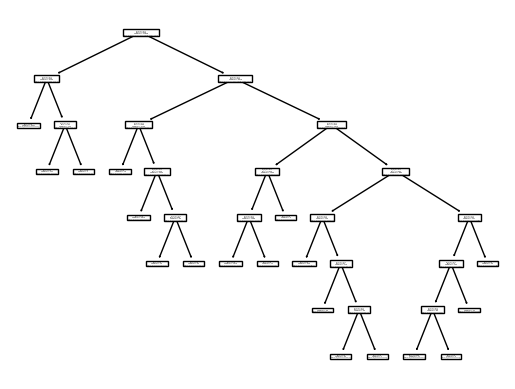

In [69]:
# Extract single tree from Random Forest Classifier Model
estimator = rfc.estimators_[10]

#Plotting the tree
tree.plot_tree(estimator);

### 2. Extreme Gradient Boosting (XGBoost) Classifier

XGBoost, is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library. It provides parallel tree boosting and is the leading machine learning library for regression, classification, and ranking problems.

In [70]:
xgb_cl = xgb.XGBClassifier(n_estimators=5)
xgb_cl = xgb_cl.fit(X_eml_enc, Y_eml_enc)

xgb_cl.score(X_eml_enc, Y_eml_enc)

0.9990942511588258

In [71]:
predicted_xgb = xgb_cl.predict(input_enc.transform(Xc_eml_test)) #Model Predicted
predicted_xgb_label = output_enc.inverse_transform(predicted_xgb.reshape(-1,1)) #Model Predicted Label by transforming inversely


### 3. Adaptive Boosting (ADA Boost) Classifier

AdaBoost (Adaptive Boosting) is a boosting ensemble method where simple Decision Trees are built sequentially. The trees consist of only a root and two leaves, so simple that they have their own name: Decision Stumps.

In [72]:
adc = AdaBoostClassifier(n_estimators=100, random_state=10)
adc = adc.fit(X_eml_enc, Y_eml_enc)
print('Accuracy score of Ada Boost Classifier:',adc.score(X_eml_enc, Y_eml_enc))

Accuracy score of Ada Boost Classifier: 0.5063668815600192


In [73]:
X_test_adc = input_enc.transform(Xc_eml_test.values) #Label Transform
Y_test_adc = output_enc.transform(yc_eml_test.values) #Label Transform

predicted_adc = adc.predict(input_enc.transform(Xc_eml_test)) #Model Predicted

predicted_label_adc = output_enc.inverse_transform(predicted_adc.reshape(-1,1)) #Model Predicted Label by transforming inversely


### 4. Voting Classifier

It is an ensemble machine learning model that combines the predictions from multiple other models. This is a technique that may be used to improve model performance, ideally achieving better performance than any single model used in the ensemble.

In [74]:
# group / ensemble of models

estimator = []
estimator.append(('LR', LogisticRegression(solver ='lbfgs', multi_class ='multinomial',max_iter = 200)))
estimator.append(('SVC', SVC(gamma ='auto', probability = True)))
estimator.append(('DTC', DecisionTreeClassifier()))

In [75]:
# Voting Classifier with hard voting

vc_hard = VotingClassifier(estimators = estimator, voting ='hard')
vc_hard.fit(X_eml_enc, Y_eml_enc)
y_pred = vc_hard.predict(input_enc.transform(Xc_eml_test))
predicted_label_vc = output_enc.inverse_transform(y_pred.reshape(-1,1))

# using accuracy_score metric to predict accuracy
print('Hard Voting Score:',vc_hard.score(X_eml_enc, Y_eml_enc))

accuracy_score = metrics.accuracy_score(yc_eml_test, predicted_label_vc)
precision_score = metrics.precision_score(yc_eml_test, predicted_label_vc,average='micro')
recall_score = metrics.recall_score(yc_eml_test, predicted_label_vc,average='micro')
f1_score = metrics.f1_score(yc_eml_test, predicted_label_vc,average='micro')
r2_score = metrics.r2_score(Y_eml_test_enc, y_pred)

Hard Voting Score: 0.9990942511588258


In [76]:
# Voting Classifier with soft voting

vc_soft = VotingClassifier(estimators = estimator, voting ='soft')
vc_soft.fit(X_eml_enc, Y_eml_enc)
y_pred = vc_soft.predict(input_enc.transform(Xc_eml_test))
predicted_label_vc = output_enc.inverse_transform(y_pred.reshape(-1,1))

# using accuracy_score
print('Soft Voting Score:',vc_soft.score(X_eml_enc, Y_eml_enc))

Soft Voting Score: 0.9991475305024242


### 5. Histogram-Based Gradient Boosting

It is one of the most popular techniques for structured (tabular) classification and regression predictive modeling problems given that it performs so well across a wide range of datasets in practice.
This estimator is much faster than Gradient Boosting Classifier for big datasets (n_samples >= 10 000).

In [77]:
hgbc_cl = HistGradientBoostingClassifier(max_iter=100).fit(X_eml_enc, Y_eml_enc)
print(hgbc_cl)
hgbc_cl.score(X_eml_enc, Y_eml_enc)

HistGradientBoostingClassifier()


0.9991475305024242

In [78]:
predicted_hgbc = hgbc_cl.predict(input_enc.transform(Xc_eml_test)) #Model Predicted
predicted_hgbc_label = output_enc.inverse_transform(predicted_hgbc.reshape(-1,1)) #Model Predicted Label by transforming inversely

## Test Results Summary of Ensemble Classification Techniques

In [79]:
from tabulate import tabulate

matrix_summary_cl = [[1, 'Random Forest', 'Estimators=100', metrics.accuracy_score(yc_eml_test, predicted_label_rfc), metrics.precision_score(yc_eml_test, predicted_label_rfc,average='micro'), metrics.recall_score(yc_eml_test, predicted_label_rfc,average='micro'), metrics.f1_score(yc_eml_test, predicted_label_rfc,average='micro'), metrics.r2_score(Y_eml_test_enc, predicted_rfc)],
                  [],[2, 'Extreme Gradient Boosting(XGBoost)', 'Estimators=5', metrics.accuracy_score(yc_eml_test, predicted_xgb_label), metrics.precision_score(yc_eml_test, predicted_xgb_label,average='micro'), metrics.recall_score(yc_eml_test, predicted_xgb_label,average='micro'), metrics.f1_score(yc_eml_test, predicted_xgb_label,average='micro'), metrics.r2_score(Y_eml_test_enc, predicted_xgb)],
                  [],[3, 'Adaptive Boosting(ADA Boost)', 'Estimators=100, \nRandom_state=10',metrics.accuracy_score(yc_eml_test, predicted_label_adc),metrics.precision_score(yc_eml_test, predicted_label_adc,average='micro'), metrics.recall_score(yc_eml_test, predicted_label_adc,average='micro'), metrics.f1_score(yc_eml_test, predicted_label_adc,average='micro'), metrics.r2_score(Y_eml_test_enc, predicted_adc)],
                 [],[4, 'Hard Voting','Voting = Hard, \nEstimators(models)=SVM,\nLogistic Regression,\nDecision Tree', accuracy_score, precision_score, recall_score, f1_score, r2_score],
                 [],[5, 'Soft Voting','Voting = Soft, \nEstimators(models)=SVM,\nLogistic Regression,\nDecision Tree', metrics.accuracy_score(yc_eml_test, predicted_label_vc), metrics.precision_score(yc_eml_test, predicted_label_vc,average='micro'), metrics.recall_score(yc_eml_test, predicted_label_vc,average='micro'), metrics.f1_score(yc_eml_test, predicted_label_vc,average='micro'), metrics.r2_score(Y_eml_test_enc, y_pred)],
                 [],[6, 'Histogram-Based \nGradient Boosting', 'max_iteration=100',metrics.accuracy_score(yc_eml_test, predicted_hgbc_label),metrics.precision_score(yc_eml_test, predicted_hgbc_label,average='micro'),metrics.recall_score(yc_eml_test, predicted_hgbc_label,average='micro'), metrics.f1_score(yc_eml_test, predicted_hgbc_label,average='micro'), metrics.r2_score(Y_eml_test_enc, predicted_hgbc)]]

print(tabulate([matrix_summary_cl][0],
               headers=['Sr.', 'Ensemble Model\n(Classification)', 'Parameter Settings', 'Accuracy', 'Precision', 'Recall', 'F1', 'R2']))

  Sr.  Ensemble Model                      Parameter Settings         Accuracy    Precision    Recall        F1         R2
       (Classification)
-----  ----------------------------------  -----------------------  ----------  -----------  --------  --------  ---------
    1  Random Forest                       Estimators=100             0.999361     0.999361  0.999361  0.999361  0.994488

    2  Extreme Gradient Boosting(XGBoost)  Estimators=5               0.999361     0.999361  0.999361  0.999361  0.994488

    3  Adaptive Boosting(ADA Boost)        Estimators=100,            0.507991     0.507991  0.507991  0.507991  0.0514366
                                           Random_state=10

    4  Hard Voting                         Voting = Hard,             0.999361     0.999361  0.999361  0.999361  0.994488
                                           Estimators(models)=SVM,
                                           Logistic Regression,
                                           Decis

Observations : Almost all the Ensemble Classification Models are giving good accuracy & are equally effective in terms of all the above tabulated test matrices except ADA Boosting. Also, in comparison to the speed, Boosting algorithms were the fastest in terms of execution time.

## Ensemble Regression Techniques

### 1. ADA Boost Regressor

An AdaBoost regressor is a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction. As such, subsequent regressors focus more on difficult cases.

In [80]:
ada_regr = AdaBoostRegressor(n_estimators=100, random_state=10)
ada_regr = ada_regr.fit(X_eml_enc, Y_eml_enc)


In [81]:
predicted_ada_regr = ada_regr.predict(input_enc.transform(Xc_eml_test)) #Model Predicted
predicted_label_ada_regr = output_enc.inverse_transform(predicted_ada_regr.reshape(-1,1)) #Model Predicted Label by transforming inversely
print('Accuracy score of ADA Boost Regressor:',ada_regr.score(X_eml_enc, Y_eml_enc))


Accuracy score of ADA Boost Regressor: 0.982863169225671


### 2. Gradient Tree Boosting Regressor

This estimator builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.

In [82]:
gdb_regr = GradientBoostingRegressor(random_state=0)
gdb_regr = ada_regr.fit(X_eml_enc, Y_eml_enc)
print('Accuracy score of Gradient Tree Boosting Regressor:',gdb_regr.score(X_eml_enc, Y_eml_enc))

Accuracy score of Gradient Tree Boosting Regressor: 0.982863169225671


In [83]:
predicted_gdb_regr = gdb_regr.predict(input_enc.transform(Xc_eml_test)) #Model Predicted

predicted_label_gdb_regr = output_enc.inverse_transform(predicted_gdb_regr.reshape(-1,1)) #Model Predicted Label by transforming inversely
print("Gradient Tree Boosting Regressor Accuracy :",metrics.accuracy_score(yc_eml_test, predicted_label_gdb_regr))


Gradient Tree Boosting Regressor Accuracy : 0.9789047517579373


Plotting the tree


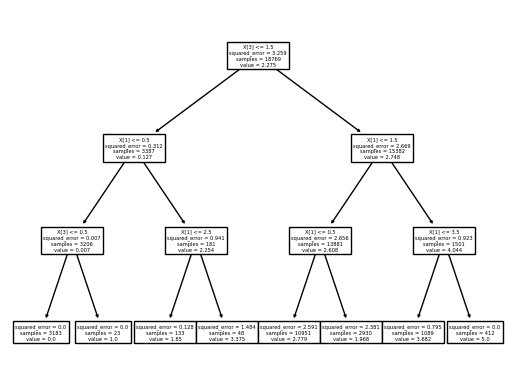

In [84]:
# Extract single tree from Random Forest Regression Model
estimator = gdb_regr.estimators_[len(gdb_regr.estimators_)-1]

print('Plotting the tree')
tree.plot_tree(estimator);

### 3. Extremely Randomized Trees Regressor

This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [85]:
ert_regr = ExtraTreesRegressor(n_estimators=100, random_state=0)
ert_regr = ert_regr.fit(X_eml_enc, Y_eml_enc)
print('Accuracy score of Extremely Randomized Trees Regressor:',ert_regr.score(X_eml_enc, Y_eml_enc))

Accuracy score of Extremely Randomized Trees Regressor: 0.9934897327852861


In [86]:
predicted_ert_regr = ert_regr.predict(input_enc.transform(Xc_eml_test)) #Model Predicted

predicted_label_ert_regr = output_enc.inverse_transform(predicted_ert_regr.reshape(-1,1)) #Model Predicted Label by transforming inversely

Plotting the tree


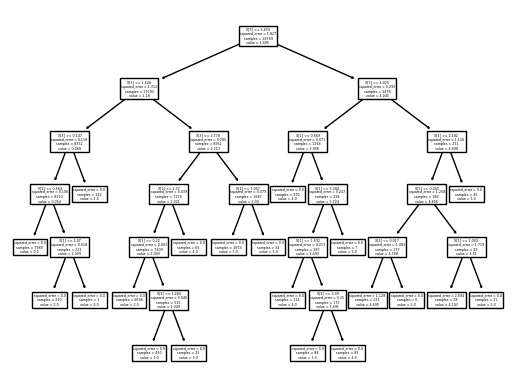

In [87]:
# Extract single tree from Extremely Randomized Trees Regressor
estimator = ert_regr.estimators_[5]

print('Plotting the tree')
tree.plot_tree(estimator);

### 4. Histogram-based Gradient Boosting Regression Tree

This estimator has native support for missing values (NaNs). During training, the tree grower learns at each split point whether samples with missing values should go to the left or right child, based on the potential gain. When predicting, samples with missing values are assigned to the left or right child consequently. If no missing values were encountered for a given feature during training, then samples with missing values are mapped to whichever child has the most samples.

In [88]:
hgb_reg = HistGradientBoostingRegressor().fit(X_eml_enc, Y_eml_enc)

predicted_hgb_reg = hgb_reg.predict(input_enc.transform(Xc_eml_test)) #Model Predicted
predicted_hgb_reg_label = output_enc.inverse_transform(predicted_hgb_reg.reshape(-1,1)) #Model Predicted Label by transforming inversely

print("Histogram-based Gradient Boosting Regression Tree Score :",hgb_reg.score(X_eml_enc, Y_eml_enc))

Histogram-based Gradient Boosting Regression Tree Score : 0.9932499322322914


### 5. Random Forest Regressor

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [89]:
rf_regr = RandomForestRegressor(max_depth=2, random_state=0).fit(X_eml_enc, Y_eml_enc)
predicted_rf_regr = rf_regr.predict(input_enc.transform(Xc_eml_test)) #Model Predicted
predicted_rf_regr_label = output_enc.inverse_transform(predicted_rf_regr.reshape(-1,1)) #Model Predicted Label by transforming inversely
print('Random Forest Regressor Score:',rf_regr.score(X_eml_enc, Y_eml_enc))


Random Forest Regressor Score: 0.94871441648246


Plotting the tree


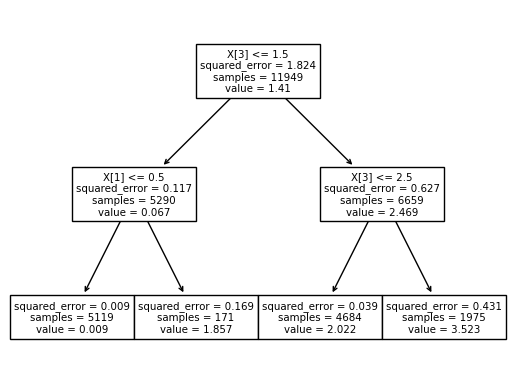

In [90]:
# Extract single tree from Extremely Randomized Trees Regressor
estimator = rf_regr.estimators_[5]

print('Plotting the tree')
tree.plot_tree(estimator);

## Test Results Summary of Ensemble Regression Techniques

In [91]:
from tabulate import tabulate

matrix_summary_regr = [[1, 'ADA Boost', 'n_estimators=100,\nrandom_state=10',metrics.accuracy_score(yc_eml_test, predicted_label_ada_regr),metrics.precision_score(yc_eml_test, predicted_label_ada_regr,average='micro'),metrics.recall_score(yc_eml_test, predicted_label_ada_regr,average='micro'),metrics.f1_score(yc_eml_test, predicted_label_ada_regr,average='micro'),metrics.r2_score(Y_eml_test_enc, predicted_ada_regr)],
                      [],[2, 'Gradient\nTree\nBoosting', 'random_state=0',metrics.accuracy_score(yc_eml_test, predicted_label_gdb_regr),metrics.precision_score(yc_eml_test, predicted_label_gdb_regr,average='micro'),metrics.recall_score(yc_eml_test, predicted_label_gdb_regr,average='micro'),metrics.f1_score(yc_eml_test, predicted_label_gdb_regr,average='micro'),metrics.r2_score(Y_eml_test_enc, predicted_gdb_regr)],
                      [],[3, 'Extremely\nRandomized\nTrees', 'n_estimators=100,\nrandom_state=0',metrics.accuracy_score(yc_eml_test, predicted_label_ert_regr),metrics.precision_score(yc_eml_test, predicted_label_ert_regr,average='micro'),metrics.recall_score(yc_eml_test, predicted_label_ert_regr,average='micro'),metrics.f1_score(yc_eml_test, predicted_label_ert_regr,average='micro'), metrics.r2_score(Y_eml_test_enc, predicted_ert_regr)],
                      [],[4, 'Histogram-based\nGradient Boosting\nRegression Tree', '',metrics.accuracy_score(yc_eml_test, predicted_hgb_reg_label),metrics.precision_score(yc_eml_test, predicted_hgb_reg_label,average='micro'),metrics.recall_score(yc_eml_test, predicted_hgb_reg_label,average='micro'),metrics.f1_score(yc_eml_test, predicted_hgb_reg_label,average='micro'),metrics.r2_score(Y_eml_test_enc, predicted_hgb_reg)],
                      [],[5, 'Random Forest Regressor', 'max_depth=2,\nrandom_state=0',metrics.accuracy_score(yc_eml_test, predicted_rf_regr_label),metrics.precision_score(yc_eml_test, predicted_rf_regr_label,average='micro'),metrics.recall_score(yc_eml_test, predicted_rf_regr_label,average='micro'),metrics.f1_score(yc_eml_test, predicted_rf_regr_label,average='micro'),metrics.r2_score(Y_eml_test_enc, predicted_rf_regr)]]


print(tabulate([matrix_summary_regr][0],
               headers=['Sr.', 'Ensemble Model\n(Regression)', 'Parameter Settings', 'Accuracy', 'Precision', 'Recall', 'F1', 'R2']))


  Sr.  Ensemble Model           Parameter Settings      Accuracy    Precision    Recall        F1        R2
       (Regression)
-----  -----------------------  --------------------  ----------  -----------  --------  --------  --------
    1  ADA Boost                n_estimators=100,       0.978905     0.978905  0.978905  0.978905  0.98538
                                random_state=10

    2  Gradient                 random_state=0          0.978905     0.978905  0.978905  0.978905  0.98538
       Tree
       Boosting

    3  Extremely                n_estimators=100,       0.992329     0.992329  0.992329  0.992329  0.994715
       Randomized               random_state=0
       Trees

    4  Histogram-based                                  0.443639     0.443639  0.443639  0.443639  0.994674
       Gradient Boosting
       Regression Tree

    5  Random Forest Regressor  max_depth=2,            0.894737     0.894737  0.894737  0.894737  0.946796
                                random

Observations : Almost all the Ensemble Regression Models are giving good accuracy & are equally effective in terms of all the above tabulated test matrices except Histogram-based Gradient Boosting Regression Tree. Also, in comparison to the speed, Boosting algorithms were the fastest in terms of execution time.

<hr>
<hr>